## Made by Luis Fernando Caro Reyna and David Gamaliel Arcos Bravo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [38]:
class Graph2D:
    
    def __init__(self, xLim, yLim, title = None):
        self._range = 500
        assert(len(xLim) == 2)
        assert(len(yLim) == 2)
        x = np.linspace(xLim[0], xLim[1], self._range)
        y = np.linspace(yLim[0], yLim[1], self._range)
        self._fig, self._ax = plt.subplots()
        if title: self._ax.set_title(title, fontsize=20)
        self._fig.set_size_inches(10,7)
        self._ax.set_xlim(xLim)
        self._ax.set_ylim(yLim)
  
    def add_point(self, point, color='r', text=None, dt=0.0, textColor="black"):
        x1, x2 = point
        self._ax.scatter(x1,x2,color=color)
        if text != None:
            plt.text(x1,x2,str(text),color=textColor)

    def add_line(self, point1, point2, color='black', text=None, dt=0.0):
        x1, y1 = point1
        x2, y2 = point2
        self._ax.plot((x1,x2),(y1,y2), color=color, marker='o')
        if text != None:
            self._ax.text(x1,x2+dt,str(text))
            
    def add_x_axis(self, color='black'):
        self._ax.axhline(0, color=color) # marker='o'

    def add_points(self, points, color='r'):
        for point in points:
            self.add_point(point, color)
    
    def getfig(self):
        return self._fig, self._ax

587.984493470384

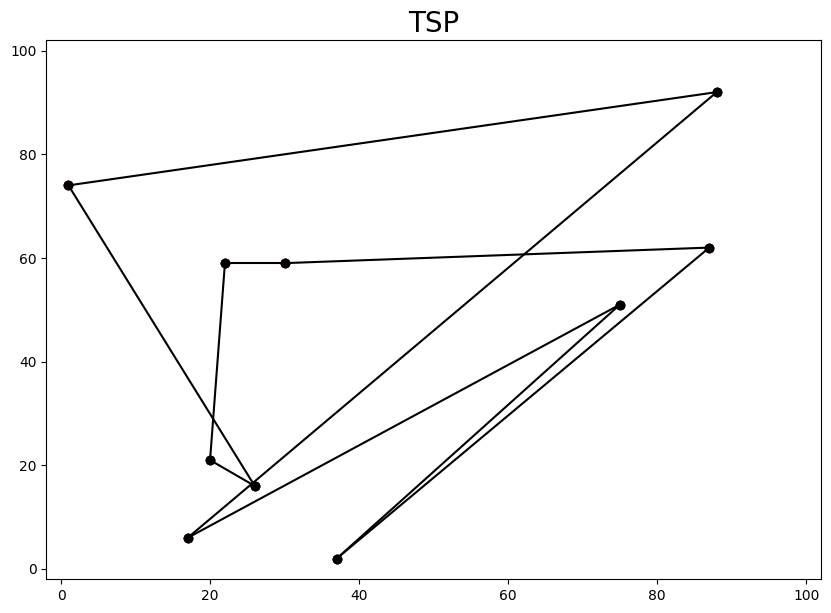

In [67]:
def getData(path='csv/adjacency_matrix.csv'):
    mat_data = pd.read_csv(path, delimiter=',')
    mat = np.array(mat_data.values)[:,1:]
    n = mat.shape[0]
    return mat, n

def getRandomNodes(n, lim):
    nodes, mat = [], []
    for i in range(n):
        x, y = np.random.randint(lim, size=2)
        nodes.append((x,y))
    for i in range(n):
        mat.append([])
        for j in range(n):
            mat[i].append(math.dist(nodes[i], nodes[j]))
    visit = np.arange(n)
    while not checkValidDistribution(visit, n):
        np.random.shuffle(visit)
    return np.array(nodes), np.array(mat), visit

def checkValidDistribution(visit, n):
    here = np.zeros(n)
    x = 0
    while here[x] == 0:
        here[x] = 1
        x = visit[x]
    return np.sum(here == 0) == 0

def calcDist(visit, mat, n):
    d = 0
    for i in range(n):
        d += mat[i,visit[i]]
    return d

def drawLines(graph, nodes, visit, n):
    for i in range(n):
        node1, node2 = nodes[i], nodes[visit[i]]
        graph.add_line(node1, node2)

lim = 100
mat, n = getData()
nodes, mat, visit = getRandomNodes(n, lim)
dist = calcDist(visit, mat, n)
graph = Graph2D((-2, lim+2), (-2, lim+2), 'TSP')
graph.add_points(nodes)
drawLines(graph, nodes, visit, n)
dist

In [446]:
def partiallyMappedCrossover(p1, p2):
    n = p1.size
    children = np.zeros(n, dtype=np.int32)
    i, j = np.random.randint(2,n-1,size=2)
    if i > j: i, j = j, i
    children[i:j] = p1[i:j].copy()
    visit = np.zeros(n)
    visit[children[i:j]] = 1
    valid = np.zeros(n)
    valid[:i] = valid[j:] = 1
    idx = i
    for k, val in enumerate(valid):
        if val == False: continue
        if not visit[p2[k]]:
            children[k] = p2[k]
        else:
            while visit[p2[idx]]: idx += 1
            children[k] = p2[idx]
            idx += 1
    return children

partiallyMappedCrossover(np.array([0,3,4,2,1,0]), np.array([0,3,4,1,2,0]))

array([0, 3, 4, 2, 1, 0])